In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from scipy import stats

In [2]:
#transcriptome
threshold=1
rna = pd.read_excel('../RNA-seq/Table_EV2.xlsx',sheet_name='B. Genes',index_col=0)
rna.drop(columns=['Classification','Tissue enhance', 'Group enriched','Tissue enriched'],inplace=True)
rna.head()
rna_vals = rna.drop(columns='Gene name')


In [3]:
#proteome
proteome = pd.read_excel('../RNA-seq/Table_EV1.xlsx',sheet_name='C. Genes',index_col=0)
proteome.drop(columns=['Classification','Tissue enhanced', 'Group enriched','Tissue enriched'],inplace=True)
proteome.head()
proteome_vals = proteome.drop(columns='Gene name')


### Overlapping genes

In [4]:
genes = set(rna_vals.index)&set(proteome_vals.index)

In [5]:
spearman_r = rna_vals.loc[genes].corrwith(proteome_vals.loc[genes],axis=1,method='spearman')

In [17]:
corr = []
for gene in genes:
    corr.append(stats.spearmanr(rna_vals.loc[gene], proteome_vals.loc[gene]))

In [21]:
rho=[]
p=[]
for val in corr:
    if val[0]<1:
        rho.append(val[0])
        p.append(val[1])

In [36]:
bins

array([-0.59593285, -0.56937649, -0.54282012, -0.51626376, -0.4897074 ,
       -0.46315103, -0.43659467, -0.41003831, -0.38348194, -0.35692558,
       -0.33036921, -0.30381285, -0.27725649, -0.25070012, -0.22414376,
       -0.19758739, -0.17103103, -0.14447467, -0.1179183 , -0.09136194,
       -0.06480557, -0.03824921, -0.01169285,  0.01486352,  0.04141988,
        0.06797624,  0.09453261,  0.12108897,  0.14764534,  0.1742017 ,
        0.20075806,  0.22731443,  0.25387079,  0.28042716,  0.30698352,
        0.33353988,  0.36009625,  0.38665261,  0.41320897,  0.43976534,
        0.4663217 ,  0.49287807,  0.51943443,  0.54599079,  0.57254716,
        0.59910352,  0.62565989,  0.65221625,  0.67877261,  0.70532898,
        0.73188534,  0.7584417 ,  0.78499807,  0.81155443,  0.8381108 ,
        0.86466716,  0.89122352,  0.91777989,  0.94433625,  0.97089262,
        0.99744898])

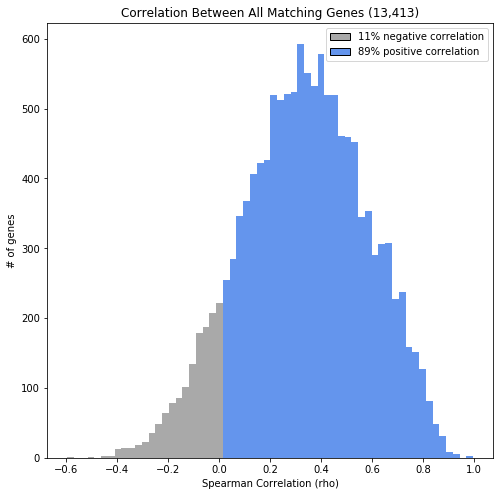

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches((8,8))
N, bins, patches = ax.hist(rho,bins=60)

low = 'darkgrey'
high = 'cornflowerblue'

for i in range(len(N)):
    if bins[i]<0:
        patches[i].set_facecolor('darkgrey')
        patches[i].set_label('12% negative correlation')
    elif bins[i]>=0:
        patches[i].set_facecolor('cornflowerblue')
        patches[i].set_label('88% positive correlation')
        
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low, high]]
labels= ["11% negative correlation", "89% positive correlation"]
ax.legend(handles, labels)
ax.set_title("Correlation Between All Matching Genes (13,413)")
ax.set_xlabel("Spearman Correlation (rho)")
ax.set_ylabel("# of genes")
#fig.savefig('Correlation_all_genes')

In [71]:
N


array([  1.,   0.,   0.,   1.,   0.,   3.,   2.,  12.,  14.,  14.,  19.,
        23.,  35.,  48.,  64.,  78.,  85., 101., 134., 178., 187., 208.,
       222., 255., 285., 346., 367., 407., 422., 427., 519., 513., 521.,
       524., 593., 551., 533., 578., 519., 520., 461., 460., 452., 345.,
       353., 291., 306., 307., 228., 237., 158., 152., 127.,  81.,  49.,
        31.,   9.,   6.,   0.,   3.])

In [73]:
pos=0
neg=0
for val,num in zip(bins,N):
    if val<0:
        neg+=num
    else:
        pos+=num

In [76]:
pos/sum(N)

0.893078937523382

In [77]:
neg/sum(N)

0.10692106247661803

In [88]:
np.where(proteome['Gene name']=='SYK')

(array([9077]),)

In [87]:
np.where(rna['Gene name']=='SYK') #ENSG00000165025

(array([10910]),)

In [90]:
np.where(rna['Gene name']=='EIF4A3') #ENSG00000141543

(array([7755]),)

In [96]:
SYK = {}
SYK['rna']=np.log10(rna_vals.loc['ENSG00000165025'])
SYK['protein']=np.log10(proteome_vals.loc['ENSG00000165025'])

EIF4A3 = {}
EIF4A3['rna']=np.log10(rna_vals.loc['ENSG00000141543'])
EIF4A3['protein']=np.log10(proteome_vals.loc['ENSG00000141543'])


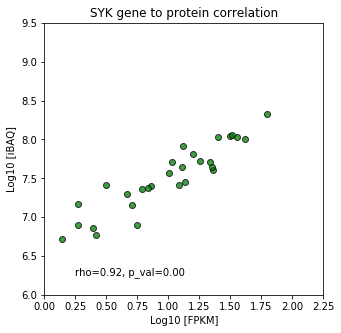

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((5,5))

rho,p = stats.spearmanr(SYK['rna'],SYK['protein'])
plt.text(.25,6.25,f'rho={rho:.2f}, p_val={p:.2f}')
ax.scatter(SYK['rna'],SYK['protein'],marker='o',alpha=.75,edgecolors='black',c='g')
ax.set_xlim(0,2.25)
ax.set_ylim(6,9.5)
ax.set_ylabel('Log10 [iBAQ]')
ax.set_xlabel('Log10 [FPKM]')
ax.set_title('SYK gene to protein correlation')
#fig.savefig('SYK_correlation')

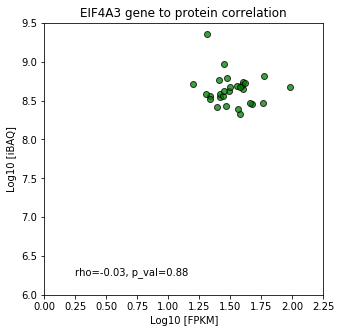

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((5,5))

rho,p = stats.spearmanr(EIF4A3['rna'],EIF4A3['protein'])


ax.scatter(EIF4A3['rna'],EIF4A3['protein'],marker='o',alpha=.75,edgecolors='black',c='g')
#ax.legend((rho[0],p[0]),('rho','p_value'))
ax.set_xlim(0,2.25)
ax.set_ylim()
ax.set_ylim(6,9.5)
ax.set_ylabel('Log10 [iBAQ]')
ax.set_xlabel('Log10 [FPKM]')
plt.text(.25,6.25,f'rho={rho:.2f}, p_val={p:.2f}')
ax.set_title('EIF4A3 gene to protein correlation')
#fig.savefig('EIF4A3_correlation')